In [103]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pipeline_v100
reload(pipeline_v100)

sns.set_palette("Set2")
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [104]:
x_s = np.linspace(0, 2.5, num=300)
n = 5
trace_out_index = np.floor(n / 2)
y_s = np.array([pipeline_v100.simulation(n=n, 
                                         a_x= 3, 
                                         h_z= x, 
                                         delta = 0.1,
                                         #m = 2**(n-1),
                                         trace_out_index = trace_out_index,
                                         derivative_delta = 1e-5,
                                         m = 1,
                                         DEBUG=True) for x in x_s])

Fidelity F = (0.9960069688087018+1.0344342953928292e-05j)

Fidelity F = (0.9960294662189222-6.932713141206213e-06j)

Fidelity F = (0.9959692015461429-6.725833461728361e-05j)

Fidelity F = (0.9960049857260319-9.020338545652678e-06j)

Fidelity F = (0.9959718754217012-5.376701374875516e-05j)

Fidelity F = (0.9960686837648951-8.90370246903744e-06j)

Fidelity F = (0.9960744579590581-7.962972909194715e-06j)

Fidelity F = (0.9960363230932715-1.1059601788593357e-05j)

Fidelity F = (0.9960220012918434-2.7302980870931388e-06j)

Fidelity F = (0.9960412484646809+3.940125998642382e-06j)

Fidelity F = (0.9960237333005907-5.762566727093701e-06j)

Fidelity F = (0.996037501695602+7.986627084195288e-06j)

Fidelity F = (0.9959635425381661+0.00010451545420378047j)

Fidelity F = (0.9961125666818853+9.368225452292584e-07j)

Fidelity F = (0.9959791996963719-7.856490027148272e-05j)

Fidelity F = (0.9960969449075565-9.491599025180348e-06j)

Fidelity F = (0.9960811608594662-5.0208017971053456e-05j)

Fidelity F 

In [105]:
y_s[0]

{'fidelity_truncated': 0.9528598503390969,
 'fidelity_truncated_generalized': (0.9739935364566148-4.026256112173737e-20j),
 'lower_tqfi': 37.71211972872245,
 'upper_tqfi': (20.80517083470816+3.221004889738989e-17j),
 'fidelity_true': 0.9960069688087017268,
 'true_qfi': 3.1944249530386179367,
 'sub_qfi_bound': 19.083670452601083,
 'super_qfi_bound': 2.130920723348417,
 'trace_rho': (1+0j),
 'trace_rho_delta': (0.9999999999999993-1.812473944148674e-18j),
 'purity_rho': (0.9609634896831227+0j),
 'purity_rho_delta': (0.9561517297936853-2.1682389088484983e-18j),
 'rank_rho': 2,
 'rank_rho_delta': 2,
 'QFI_from_SLD': 3.2763302240910623}

In [ ]:
# pipelines return debug info only if we are in DEBUG==True
purity_rho = np.array([np.real(x["purity_rho"]) for x in y_s ])
purity_rho_delta = np.array([np.real(x["purity_rho_delta"]) for x in y_s ])
lower_tqfi = np.array([np.real(x["lower_tqfi"]) for x in y_s ])
upper_tqfi = np.array([np.real(x["upper_tqfi"]) for x in y_s ])
true_qfi = np.array([np.real(x["true_qfi"]) for x in y_s ])
true_fidelity = np.array([np.real(x["fidelity_true"]) for x in y_s ])
fidelity_truncated = np.array([np.real(x["fidelity_truncated"]) for x in y_s ])
fidelity_generalized = np.array([np.real(x["fidelity_truncated_generalized"]) for x in y_s ])

sub_qfi_bound = np.array([np.real(x["sub_qfi_bound"]) for x in y_s ])
super_qfi_bound = np.array([np.real(x["super_qfi_bound"]) for x in y_s ])
qfi_from_sld = np.array([np.real(x["QFI_from_SLD"]) for x in y_s ])

error = np.max([np.imag(x["lower_tqfi"]) for x in y_s ])
print(error)

0.0


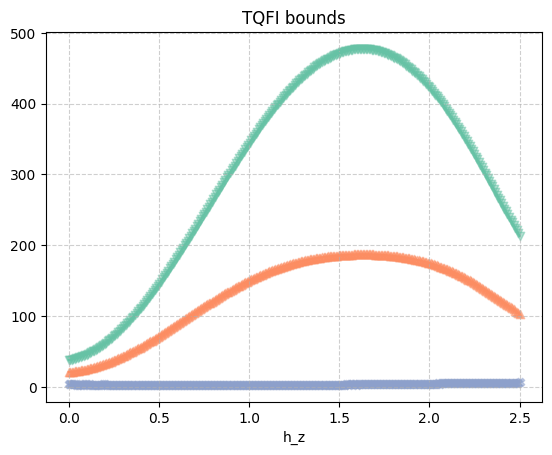

In [ ]:
plt.scatter(x_s, lower_tqfi, marker="v", alpha=0.5)
plt.plot(x_s, lower_tqfi, label="Lower TQFI bound")
plt.scatter(x_s, (upper_tqfi), marker="^", alpha=0.5)
plt.plot(x_s, (upper_tqfi), label="Upper TQFI bound")
plt.scatter(x_s, (true_qfi), marker="X", alpha=0.5)
plt.plot(x_s, (true_qfi), label="True QFI")
plt.scatter(x_s, (), marker="X", alpha=0.5)
plt.plot(x_s, (true_qfi), label="True QFI")
plt.title("TQFI bounds")
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability
plt.xlabel("h_z")
plt.show()

In [76]:
print(f"max at h_z = {x_s[np.argmax(lower_tqfi)]}")

max at h_z = 1.4046822742474916


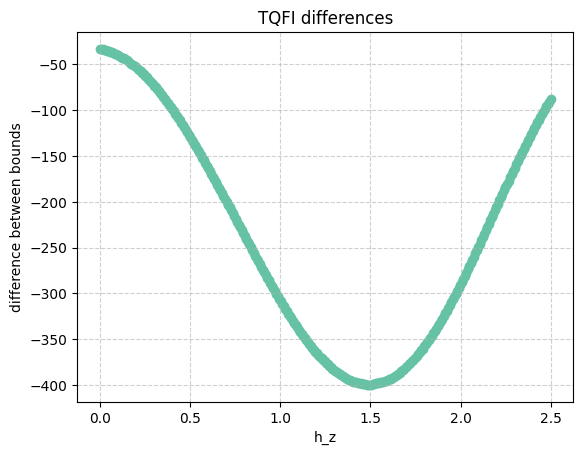

In [77]:
plt.scatter(x_s,upper_tqfi - lower_tqfi)
plt.plot(x_s,upper_tqfi - lower_tqfi)
plt.title("TQFI differences")
plt.ylabel("difference between bounds")
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability
plt.xlabel("h_z")
plt.show()

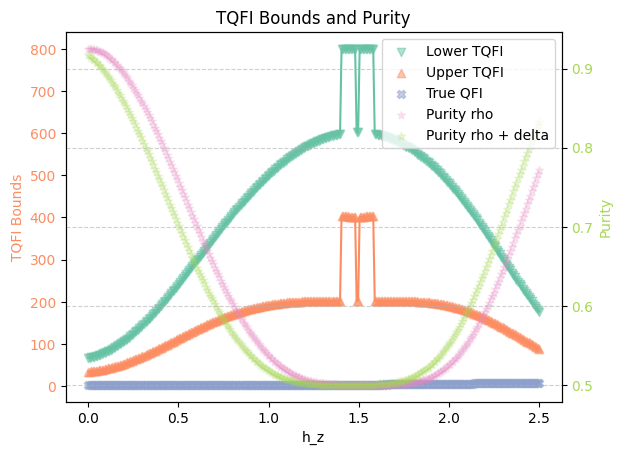

In [78]:
fig, ax1 = plt.subplots()

palette = sns.color_palette("Set2")

# First y-axis
ax1.scatter(x_s, lower_tqfi, alpha=0.5, marker="v", label="Lower TQFI", color = palette[0])
ax1.plot(x_s, lower_tqfi)
ax1.scatter(x_s, upper_tqfi, marker="^", alpha=0.5, label="Upper TQFI", color =  palette[1])
ax1.plot(x_s, upper_tqfi)
ax1.scatter(x_s, true_qfi, marker= "X", alpha=0.5, label="True QFI", color = palette[2])
ax1.plot(x_s, true_qfi)

ax1.set_xlabel("h_z")
ax1.set_ylabel("TQFI Bounds", color= palette[1])
ax1.tick_params(axis='y', labelcolor= palette[1])

# Second y-axis
ax2 = ax1.twinx()
ax2.scatter(x_s, purity_rho, alpha=0.2, marker="*",label="Purity rho", 
            color= palette[3])
ax2.scatter(x_s, purity_rho_delta, alpha=0.2, marker="*", label="Purity rho + delta", color = palette[4])

ax2.set_ylabel("Purity", color=palette[4])
ax2.tick_params(axis='y', labelcolor=palette[4])

plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability

# Legend
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.title("TQFI Bounds and Purity")
plt.show()


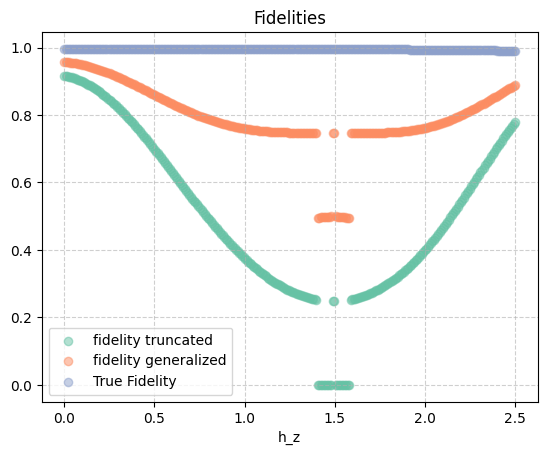

In [79]:
fig, ax1 = plt.subplots()

palette = sns.color_palette("Set2")

# First y-axis
ax1.scatter(x_s, fidelity_truncated, alpha=0.5, label="fidelity truncated", color =  palette[0])
ax1.scatter(x_s, fidelity_generalized, alpha=0.5, label="fidelity generalized", color =  palette[1])
ax1.scatter(x_s, true_fidelity, alpha=0.5, label="True Fidelity", color = palette[2])
ax1.set_xlabel("h_z")
ax1.legend()

plt.title("Fidelities")
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability
plt.show()


In [80]:
np.min(true_fidelity)

0.9910593900755948274

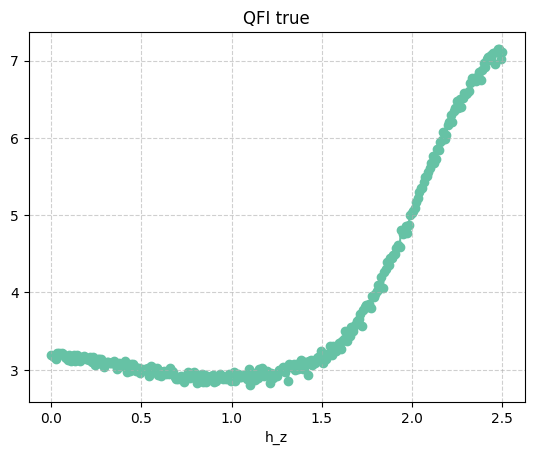

In [81]:
plt.scatter(x_s,true_qfi)
plt.plot(x_s,true_qfi)
plt.xlabel("h_z")
plt.title("QFI true")
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability


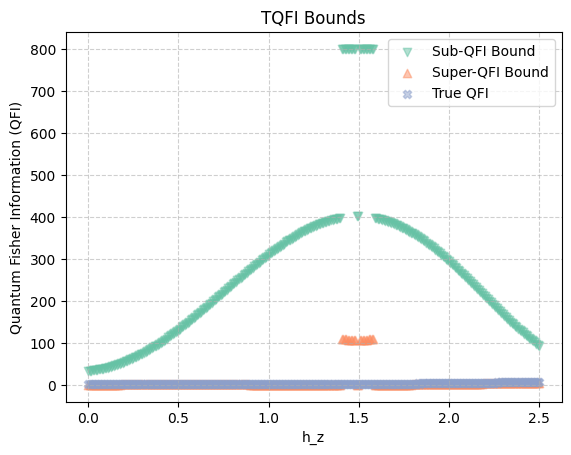

In [82]:
plt.scatter(x_s, sub_qfi_bound, marker = "v",alpha=0.5, label="Sub-QFI Bound", color=palette[0])
plt.scatter(x_s, super_qfi_bound,marker = "^", alpha=0.5, label="Super-QFI Bound", color=palette[1])
plt.scatter(x_s, true_qfi, marker = "X",alpha=0.5, label="True QFI", color=palette[2])
plt.plot(x_s, true_qfi, linestyle="dashed", color=palette[2], alpha=0.7)

plt.title("TQFI Bounds")
plt.xlabel("h_z")
plt.ylabel("Quantum Fisher Information (QFI)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability

plt.show()


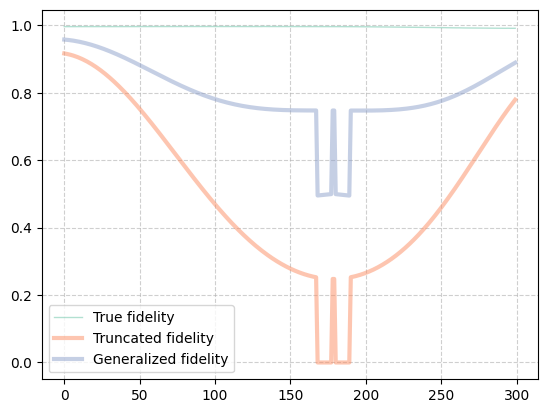

In [83]:
plt.plot(true_fidelity, label="True fidelity", alpha=0.5, linewidth=1)
plt.plot(fidelity_truncated, label="Truncated fidelity", alpha=0.5, linewidth=3)
plt.plot(fidelity_generalized, label="Generalized fidelity", alpha=0.5, linewidth=3)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability

In [84]:
all(super_qfi_bound >=  true_qfi)

False